In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In the context of the "Healthcare Provider Fraud Detection Analysis" dataset, understanding the distinction between **inpatient** and **outpatient** care is crucial:
  
**Outpatient Care:**
- **Definition:** Medical services rendered to patients who visit a healthcare facility for diagnosis or treatment but do not require an overnight stay.
- **Characteristics:** Suitable for less severe conditions or routine procedures; patients receive care and return home the same day.
- **Examples:** Routine check-ups, minor surgeries, diagnostic tests (e.g., blood tests, X-rays), and therapies like physiotherapy.
This distinction is essential for analyzing healthcare data, as the nature of care impacts billing, resource utilization, and potential fraud detection.

In [2]:
def clear_cols(s):
    return s.strip().replace(" ","_")

path = '../Healthcare Provider Fraud Detection Analysis/Train_Outpatientdata-1542865627584.csv'
df = pd.read_csv(path).rename(columns=clear_cols)
pd.set_option('display.max_columns', 50)

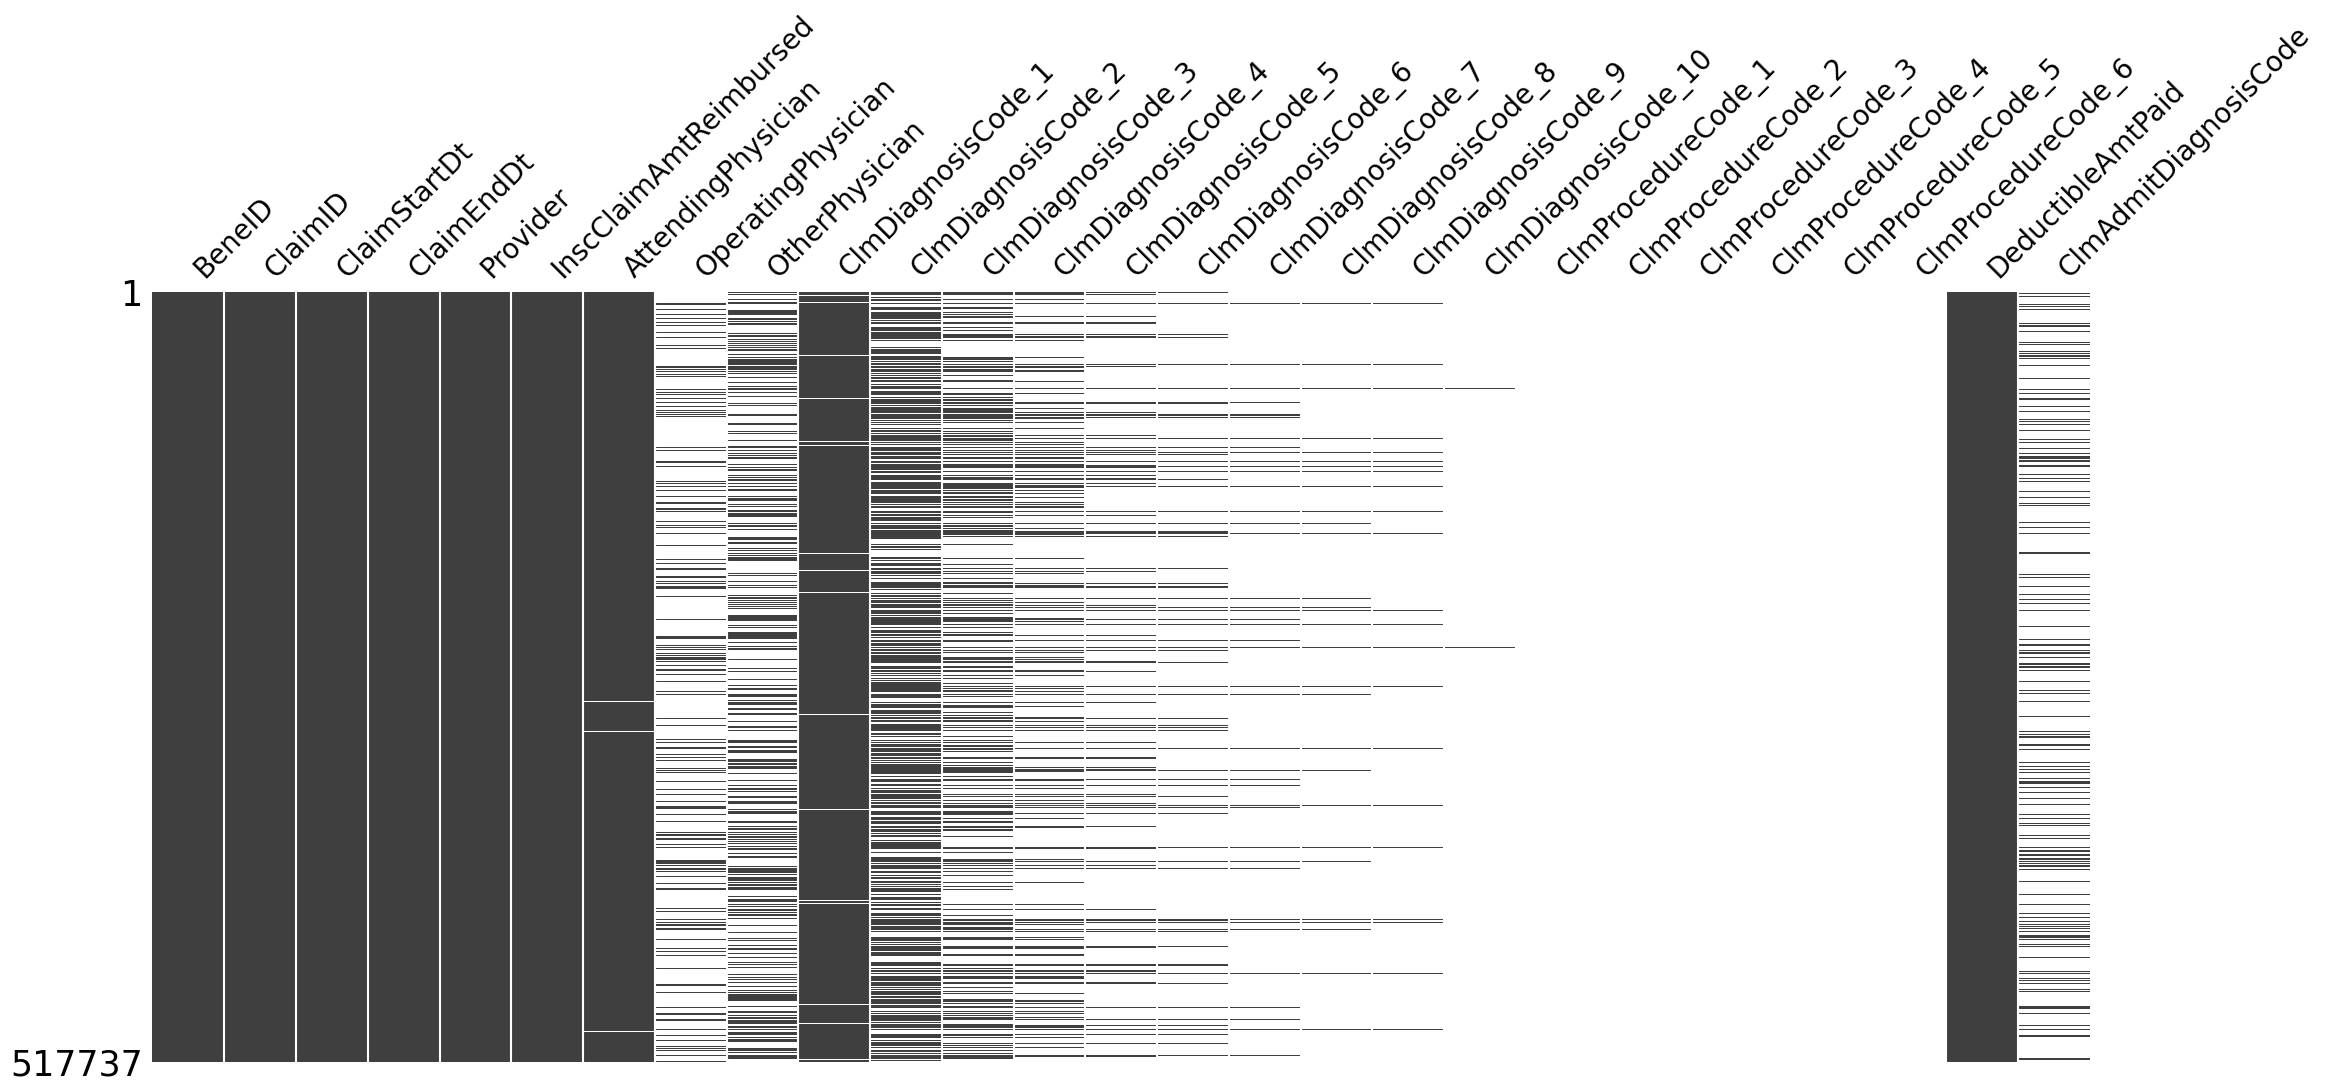

In [4]:
msno.matrix(df, sparkline=False, fontsize=20)
plt.show()

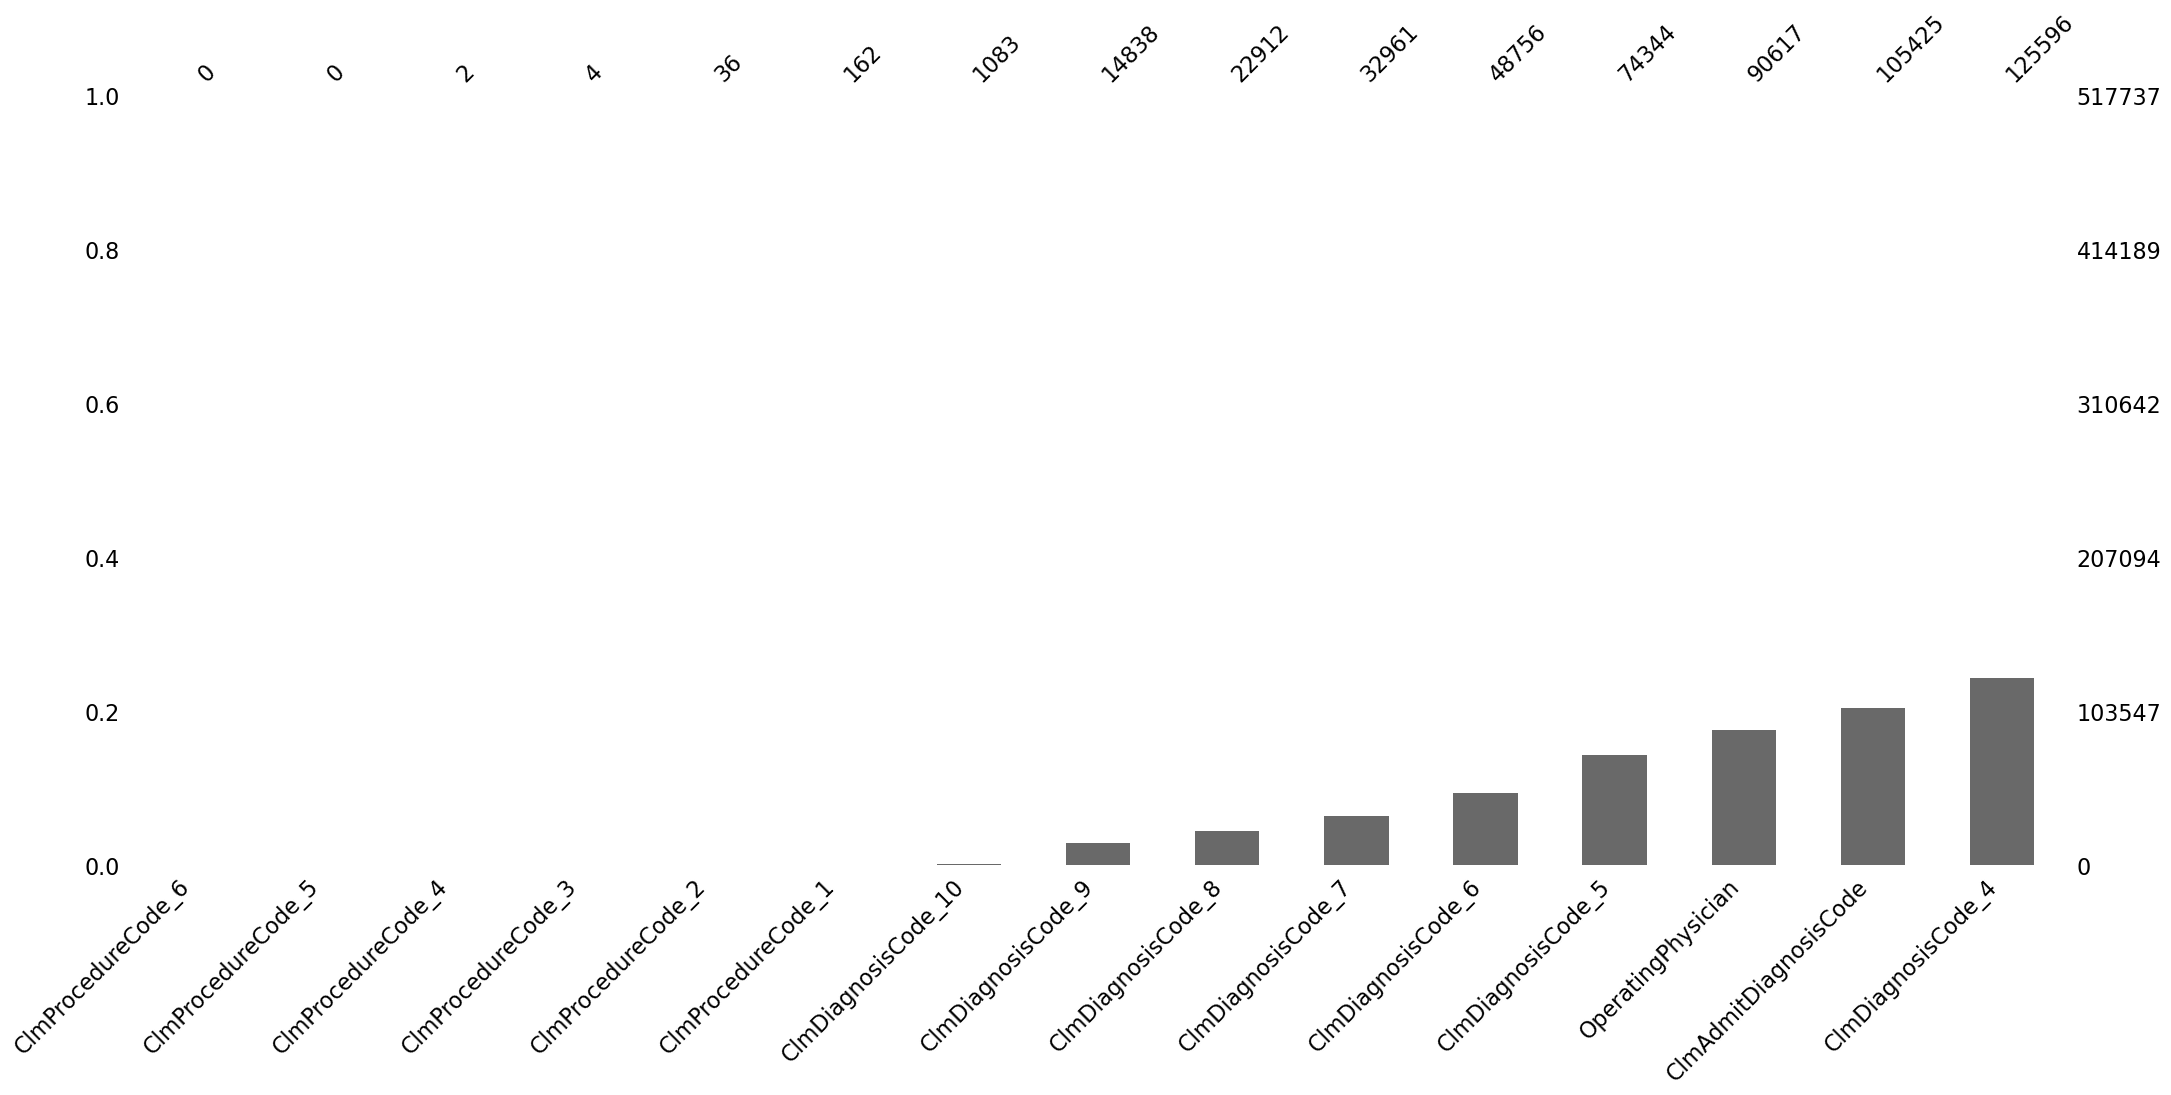

In [5]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

# Combining the counts and percentages into a DataFrame for better visualization
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})

# Sort the DataFrame columns by the percentage of missing values
sorted_df = df[missing_info.sort_values(by='Percentage', ascending=False).index]

# Select the top 15 columns with the most missing values
top_15_missing = sorted_df.iloc[:, :15]

#Visual with missingno
msno.bar(top_15_missing)
plt.show()

In [6]:
print(f"Shape of dataset: {df.shape}")
df.head()

Shape of dataset: (517737, 27)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [7]:
df.columns.to_list()

['BeneID',
 'ClaimID',
 'ClaimStartDt',
 'ClaimEndDt',
 'Provider',
 'InscClaimAmtReimbursed',
 'AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'DeductibleAmtPaid',
 'ClmAdmitDiagnosisCode']

In [8]:
df.sample()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
504369,BENE155308,CLM555759,2009-08-31,2009-09-02,PRV51159,1200,PHY404292,PHY419981,PHY419981,1749,4019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1742


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [10]:
# presentage of missing values
df.isna().sum()/len(df) *100

BeneID                      0.000000
ClaimID                     0.000000
ClaimStartDt                0.000000
ClaimEndDt                  0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.269635
OperatingPhysician         82.497484
OtherPhysician             62.327205
ClmDiagnosisCode_1          2.018979
ClmDiagnosisCode_2         37.737307
ClmDiagnosisCode_3         60.741264
ClmDiagnosisCode_4         75.741351
ClmDiagnosisCode_5         85.640586
ClmDiagnosisCode_6         90.582864
ClmDiagnosisCode_7         93.633640
ClmDiagnosisCode_8         95.574587
ClmDiagnosisCode_9         97.134066
ClmDiagnosisCode_10        99.790820
ClmProcedureCode_1         99.968710
ClmProcedureCode_2         99.993047
ClmProcedureCode_3         99.999227
ClmProcedureCode_4         99.999614
ClmProcedureCode_5        100.000000
ClmProcedureCode_6        100.000000
DeductibleAmtPaid           0.000000
ClmAdmitDiagnosisCode      79.637345
d

In [11]:
df.describe()

,InscClaimAmtReimbursed,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid
count,517737.000000,162.000000,36.000000,4.000000,2.000000,0.0,0.0,517737.000000
mean,286.334799,6116.611111,4503.277778,2959.000000,4075.500000,NaN,NaN,2.779233
std,694.034343,3217.719258,2504.015000,1863.455393,5323.806956,NaN,NaN,15.785839
min,0.000000,51.000000,412.000000,412.000000,311.000000,NaN,NaN,0.000000
25%,40.000000,3893.000000,2724.000000,2146.000000,2193.250000,NaN,NaN,0.000000
50%,80.000000,5244.500000,4019.000000,3511.500000,4075.500000,NaN,NaN,0.000000
75%,200.000000,9421.500000,5849.000000,4324.500000,5957.750000,NaN,NaN,0.000000
max,102500.000000,9999.000000,9982.000000,4401.000000,7840.000000,NaN,NaN,897.000000


In [12]:
# convert dates to datetime format 
df['ClaimStartDt'] = pd.to_datetime(df['ClaimStartDt'])
df['ClaimEndDt'] = pd.to_datetime(df['ClaimEndDt'])


In [13]:
df['ClaimStartDt'].min(), df['ClaimStartDt'].max()

(Timestamp('2008-12-12 00:00:00'), Timestamp('2009-12-31 00:00:00'))

In [14]:
df['ClaimEndDt'].min(), df['ClaimEndDt'].max()

(Timestamp('2008-12-28 00:00:00'), Timestamp('2009-12-31 00:00:00'))

In [15]:
print(f"Shape of dataset -> {df.shape}")
print(f"Nomber of providers in dataset -> {df['Provider'].nunique()}")
print(f"Number of physicians -> {df['OtherPhysician'].nunique()}")
print(f"Number of unique attending physicians -> {df['AttendingPhysician'].nunique()}")
print(f"Number of unique physicians values -> {df['OperatingPhysician'].nunique()}")
print(f"Number of unique other physicians values -> {df['OtherPhysician'].nunique()}")

Shape of dataset -> (517737, 27)
Nomber of providers in dataset -> 5012
Number of physicians -> 44388
Number of unique attending physicians -> 74109
Number of unique physicians values -> 28532
Number of unique other physicians values -> 44388


In [16]:
df.isnull().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

In [17]:
df[df.isnull().any(axis=1)]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,V4575,53190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,5781,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,78079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [18]:
df.duplicated().sum()


np.int64(0)

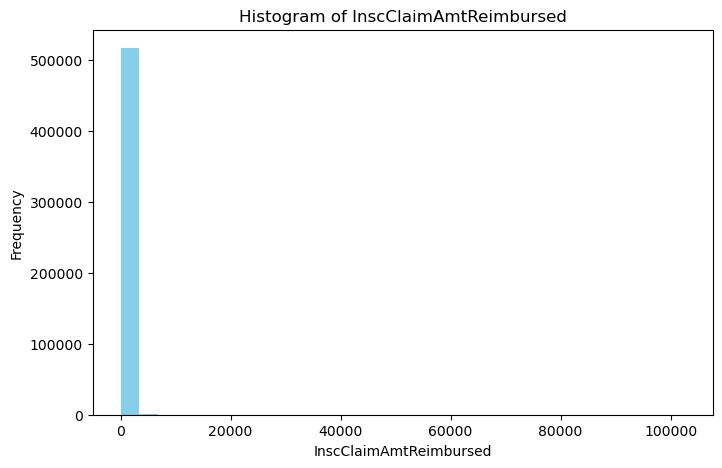

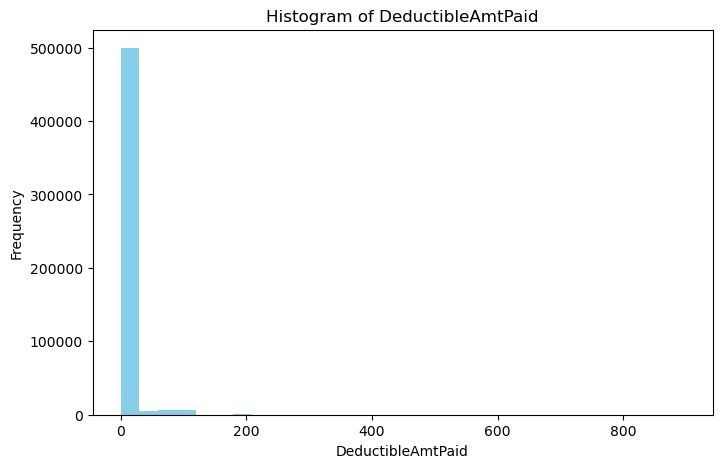

In [19]:
def plot_hist(cols):
    """
    Plots histograms for the specified columns in the dataframe.

    Parameters:
        cols (list): List of column names to plot.
    """
    for col in cols:
        if col in df.columns:
            plt.figure(figsize=(8, 5))
            df[col].plot(kind='hist', bins=30, color='skyblue')
            plt.title(f'Histogram of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.show()


plot_hist(['InscClaimAmtReimbursed', 'DeductibleAmtPaid'])

### The column ClmAdmitDiagnosisCode apears in both inpatient and outpatient data, but some of the top diagnosis code are missing in the other file sometime

In [20]:
df['ClmAdmitDiagnosisCode'].value_counts().reset_index().sort_values(by='count',ascending=False)

,ClmAdmitDiagnosisCode,count
0,V7612,4074
1,42731,3001
2,4019,2627
3,25000,2346
4,V5883,1871
...,...,...
2982,33920,1
2983,9630,1
2984,32726,1
2985,V6540,1


In [21]:
df.loc[df['ClmAdmitDiagnosisCode'] == '78650']


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
166,BENE11049,CLM547051,2009-08-27,2009-08-27,PRV56710,300,PHY333371,NaN,NaN,4919,4299,27800,2762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,78650
4977,BENE12442,CLM430769,2009-06-23,2009-06-23,PRV55935,60,PHY392434,NaN,NaN,5172,49390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,78650
7998,BENE13261,CLM451793,2009-07-04,2009-07-05,PRV55819,300,PHY395706,PHY337981,NaN,55842,V5869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,78650
8999,BENE13582,CLM215592,2009-02-26,2009-02-26,PRV51427,60,PHY334559,PHY341070,NaN,41400,4019,78650,V462,412,42731,V1005,V5861,V4582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,78650
10310,BENE13947,CLM561917,2009-09-04,2009-09-04,PRV57052,90,PHY432926,NaN,NaN,9115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,78650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513700,BENE158031,CLM629462,2009-10-13,2009-10-13,PRV56212,300,PHY368039,NaN,PHY368039,2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,78650
514266,BENE158206,CLM297004,2009-04-10,2009-04-10,PRV55165,400,PHY351710,NaN,NaN,80701,V4365,2724,4019,41401,V5861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,78650
514708,BENE158322,CLM177908,2009-02-05,2009-02-05,PRV56835,30,PHY340008,PHY340008,NaN,80515,V5869,25000,71690,7905,75310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,78650
514909,BENE158378,CLM385102,2009-05-28,2009-05-28,PRV52021,100,PHY373882,NaN,NaN,49301,73300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,78650


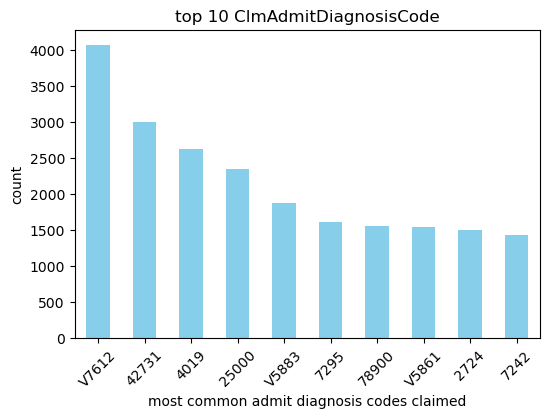

In [22]:
df['ClmAdmitDiagnosisCode'].value_counts().head(10).plot(kind='bar', figsize=(6, 4),color='skyblue')
plt.title('top 10 ClmAdmitDiagnosisCode')
plt.xlabel('most common admit diagnosis codes claimed')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

In [27]:
def plot_barplot(data, col):
    data = data[col].value_counts()
    plt.figure(figsize=(6,5))
    ax = data.plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    plt.show()


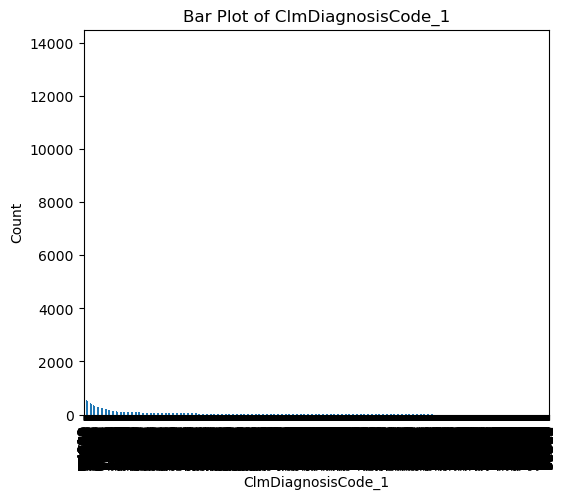

In [28]:
plot_barplot(df, 'ClmDiagnosisCode_1')

<Axes: xlabel='ClmDiagnosisCode_1'>

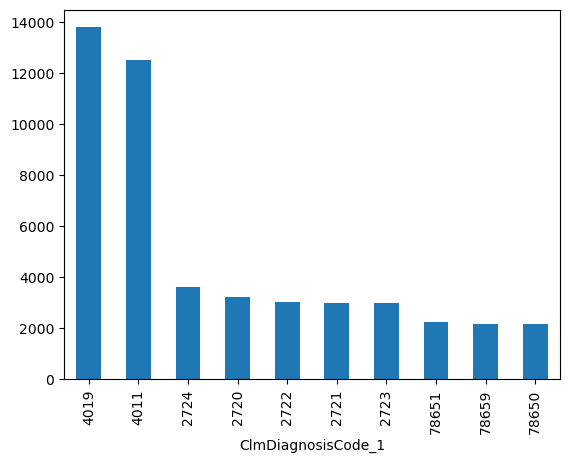

In [37]:
df['ClmDiagnosisCode_1'].value_counts().nlargest(10).plot(kind='bar')

# Calculate the cost of fraud in the outpatient dataset

In [3]:
train_df = pd.read_csv('../Healthcare Provider Fraud Detection Analysis/Train-1542865627584.csv').rename(columns=clear_cols)
train_df.sample()

,Provider,PotentialFraud
3376,PRV55233,No


In [4]:
df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,V4575,53190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,5781,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,78079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [5]:
grouped_provider = df.groupby('Provider')['InscClaimAmtReimbursed'].sum().reset_index()
grouped_provider

,Provider,InscClaimAmtReimbursed
0,PRV51001,7640
1,PRV51003,32670
2,PRV51004,52170
3,PRV51005,280910
4,PRV51007,14710
...,...,...
5007,PRV57759,10640
5008,PRV57760,4770
5009,PRV57761,18470
5010,PRV57762,1900


In [6]:
cost_of_fraud = grouped_provider.merge(train_df,
                                       on='Provider',
                                       how='left').fillna(0)
cost_of_fraud
# Using left join will give the same number of rows for this specific case. Which is what I want

,Provider,InscClaimAmtReimbursed,PotentialFraud
0,PRV51001,7640,No
1,PRV51003,32670,Yes
2,PRV51004,52170,No
3,PRV51005,280910,Yes
4,PRV51007,14710,No
...,...,...,...
5007,PRV57759,10640,No
5008,PRV57760,4770,No
5009,PRV57761,18470,No
5010,PRV57762,1900,No


In [7]:
cost_of_fraud['InscClaimAmtReimbursed'].value_counts()

InscClaimAmtReimbursed
100      31
50       24
80       23
70       20
300      20
         ..
8110      1
11550     1
7060      1
54860     1
43610     1
Name: count, Length: 2800, dtype: int64

In [8]:
cost_of_fraud = cost_of_fraud.groupby(
    'PotentialFraud'
    )['InscClaimAmtReimbursed'].sum().reset_index()

In [9]:
df['InscClaimAmtReimbursed'].sum()


np.int64(148246120)

In [10]:
cost_of_fraud

,PotentialFraud,InscClaimAmtReimbursed
0,No,93853510
1,Yes,54392610


In [12]:
148246120-93853510

54392610

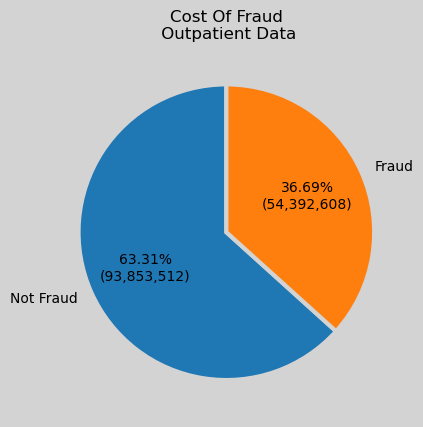

In [11]:
values = cost_of_fraud['InscClaimAmtReimbursed']

fig, ax = plt.subplots()
def make_autopct(values):
    """
    Returns a function that computes both the 
    percentage and the raw value for a pie slice.
    """
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f"{pct:.2f}%\n({val:,})"
    return my_autopct

fig.patch.set_facecolor('lightgray')
ax.set_facecolor('lightgray')
ax.pie(
    values,
    labels=['Not Fraud', 'Fraud'],
    autopct=make_autopct(values),  # custom autopct
    startangle=90,
    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'lightgray' }
)
plt.title('Cost Of Fraud\n Outpatient Data')
# ax.legend()
plt.show()


-----
# Add train dataset to this notebook, merge it and check for ratio of fraudulent provider or others

In [22]:
train = '../Healthcare Provider Fraud Detection Analysis/Train-1542865627584.csv'
trainFile = pd.read_csv(train).rename(columns=clear_cols)


In [23]:
OutpatientAndTrain = df.merge(trainFile, on='Provider', how='left')
print(OutpatientAndTrain.shape)
OutpatientAndTrain.head(2)


(517737, 28)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,Yes
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,No


In [24]:
test1= OutpatientAndTrain.groupby('Provider')['PotentialFraud'].value_counts().reset_index()
test1

,Provider,PotentialFraud,count
0,PRV51001,No,20
1,PRV51003,Yes,70
2,PRV51004,No,149
3,PRV51005,Yes,1165
4,PRV51007,No,69
...,...,...,...
5007,PRV57759,No,28
5008,PRV57760,No,22
5009,PRV57761,No,82
5010,PRV57762,No,1


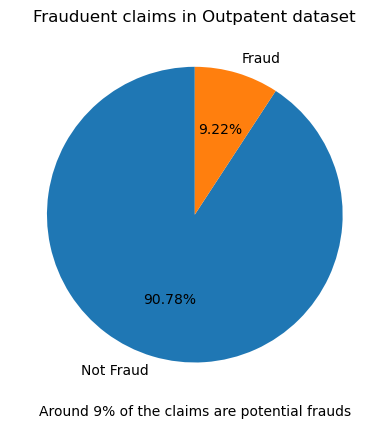

In [25]:
plt.pie(test1['PotentialFraud'].value_counts(),
        labels=['Not Fraud', 'Fraud'],
        autopct='%1.2f%%',
        startangle=90
        )
plt.title('Frauduent claims in Outpatent dataset')
plt.xlabel('Around 9% of the claims are potential frauds')
plt.show()